<a href="https://colab.research.google.com/github/keertivardhan747/Simple-predictive-model/blob/main/Simple_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv


In [27]:
!pip install streamlit -quite
!pip install scikit-learn



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [32]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv


In [33]:
import os
os.listdir()


['.config',
 'historical_data.csv',
 'fear_greed_index.csv',
 'historical_data (1).csv',
 'app.py',
 'sample_data']

In [34]:
#load both the dataset
import pandas as pd

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

trades.head()


Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [35]:
print("Trades Columns:")
print(trades.columns)

print("\nSentiment Columns:")
print(sentiment.columns)


Trades Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [36]:
import pandas as pd

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")



In [37]:
#rename trade coloumn
trades = trades.rename(columns={
    'Account': 'trader_id',
    'Closed PnL': 'pnl',
    'Size USD': 'position_size',
    'Side': 'side'
})
# Convert 'Timestamp IST' to datetime and set it as the new 'timestamp'
trades['timestamp'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['date'] = trades['timestamp'].dt.date

In [38]:
#clean sentiment
sentiment = sentiment.rename(columns={
    'value': 'sentiment_value',
    'classification': 'sentiment_label'
})
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [39]:
sentiment = sentiment[['date', 'sentiment_value', 'sentiment_label']]


In [40]:
data = trades.merge(sentiment, on='date', how='left')

print("Merged shape:", data.shape)
data.head()


Merged shape: (211224, 20)


,trader_id,Coin,Execution Price,Size Tokens,position_size,side,Timestamp IST,Start Position,Direction,pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,date,sentiment_value,sentiment_label
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80.0,Extreme Greed


In [41]:
data[['date','pnl','sentiment_value','sentiment_label']].head()


,date,pnl,sentiment_value,sentiment_label
0,2024-12-02,0.0,80.0,Extreme Greed
1,2024-12-02,0.0,80.0,Extreme Greed
2,2024-12-02,0.0,80.0,Extreme Greed
3,2024-12-02,0.0,80.0,Extreme Greed
4,2024-12-02,0.0,80.0,Extreme Greed


In [42]:
#overlappig dates
print("Trade date range:", trades['date'].min(), "to", trades['date'].max())
print("Sentiment date range:", sentiment['date'].min(), "to", sentiment['date'].max())


Trade date range: 2023-05-01 to 2025-05-01
Sentiment date range: 2018-02-01 to 2025-05-02


In [43]:
trades[['timestamp', 'Timestamp IST']].head()

,timestamp,Timestamp IST
0,2024-12-02 22:50:00,02-12-2024 22:50
1,2024-12-02 22:50:00,02-12-2024 22:50
2,2024-12-02 22:50:00,02-12-2024 22:50
3,2024-12-02 22:50:00,02-12-2024 22:50
4,2024-12-02 22:50:00,02-12-2024 22:50


In [44]:
# Drop wrong timestamp if already created
if 'timestamp' in trades.columns:
    trades = trades.drop(columns=['timestamp'])
trades['timestamp'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)
trades['date'] = trades['timestamp'].dt.date
print("Trade date range:", trades['date'].min(), "to", trades['date'].max())


Trade date range: 2023-05-01 to 2025-05-01


In [45]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
data = trades.merge(sentiment, on='date', how='left')

print("Merged shape:", data.shape)
data[['date','pnl','sentiment_value','sentiment_label']].head()


Merged shape: (211224, 20)


,date,pnl,sentiment_value,sentiment_label
0,2024-12-02,0.0,80.0,Extreme Greed
1,2024-12-02,0.0,80.0,Extreme Greed
2,2024-12-02,0.0,80.0,Extreme Greed
3,2024-12-02,0.0,80.0,Extreme Greed
4,2024-12-02,0.0,80.0,Extreme Greed


In [46]:
daily = data.groupby(['trader_id','date']).agg({
    'pnl':'sum',
    'position_size':'mean',
    'sentiment_value':'first',
    'sentiment_label':'first'
}).reset_index()

daily.head()


,trader_id,date,pnl,position_size,sentiment_value,sentiment_label
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,5089.718249,76.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,7976.664412,90.0,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,23734.500000,83.0,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,28186.666667,94.0,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,17248.148148,79.0,Extreme Greed


In [47]:
daily = daily.sort_values(['trader_id','date'])

daily['next_day_pnl'] = daily.groupby('trader_id')['pnl'].shift(-1)

daily.head()


,trader_id,date,pnl,position_size,sentiment_value,sentiment_label,next_day_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,5089.718249,76.0,Extreme Greed,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,7976.664412,90.0,Extreme Greed,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,23734.500000,83.0,Extreme Greed,-21227.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,28186.666667,94.0,Extreme Greed,1603.1
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,17248.148148,79.0,Extreme Greed,-132271.0


In [54]:
# Create win column in original merged data
data['win'] = (data['pnl'] > 0).astype(int)

# Aggregate behavior features
behavior_daily = data.groupby(['trader_id','date']).agg(
    trade_count=('pnl','count'),
    win_rate=('win','mean')
).reset_index()

# Merge into daily
daily = daily.merge(
    behavior_daily,
    on=['trader_id','date'],
    how='left'
)


In [55]:
def bucket(x):
    if x < 0:
        return 0   # Loss
    elif x < 500:
        return 1   # Small Profit
    else:
        return 2   # High Profit

daily = daily.dropna()
daily['target'] = daily['next_day_pnl'].apply(bucket)

daily.head()
features = ['sentiment_value', 'position_size', 'trade_count', 'win_rate']



In [56]:
#prediction model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# features are already updated in the previous cell
X = daily[features]
y = daily['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.20      0.05      0.08        38
           1       0.60      0.64      0.62       231
           2       0.53      0.56      0.54       193

    accuracy                           0.56       462
   macro avg       0.44      0.42      0.42       462
weighted avg       0.54      0.56      0.54       462



In [57]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=features)
importance = importance.sort_values(ascending=False)

print(importance)


position_size      0.329728
trade_count        0.265580
sentiment_value    0.230000
win_rate           0.174693
dtype: float64


In [58]:
behavior = data.copy()

behavior['win'] = (behavior['pnl'] > 0).astype(int)

behavior_daily = behavior.groupby(['trader_id','date']).agg(
    trade_count=('pnl','count'),
    win_rate=('win','mean')
).reset_index()


In [59]:
# Remove all existing columns that might conflict with 'trade_count' and 'win_rate'
# from previous runs or incorrect assignments. This includes any _x, _y suffixes as well as the base names.
for col_prefix in ['trade_count', 'win_rate']:
    for col in [col_prefix, f'{col_prefix}_x', f'{col_prefix}_y']:
        if col in daily.columns:
            daily = daily.drop(columns=[col])

# Merge behavior_daily into daily. Since we dropped conflicting columns,
# 'trade_count' and 'win_rate' from behavior_daily will be added without suffixes.
daily = daily.merge(
    behavior_daily,
    on=['trader_id','date'],
    how='left'
)

daily.head()

,trader_id,date,pnl,position_size,sentiment_value,sentiment_label,next_day_pnl,target,trade_count,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,5089.718249,76.0,Extreme Greed,0.0,1,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,7976.664412,90.0,Extreme Greed,0.0,1,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,23734.500000,83.0,Extreme Greed,-21227.0,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,28186.666667,94.0,Extreme Greed,1603.1,2,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,17248.148148,79.0,Extreme Greed,-132271.0,0,27,0.444444


In [60]:
daily['trade_count'] = ...


In [61]:
features = ['sentiment_value','position_size','trade_count','win_rate']


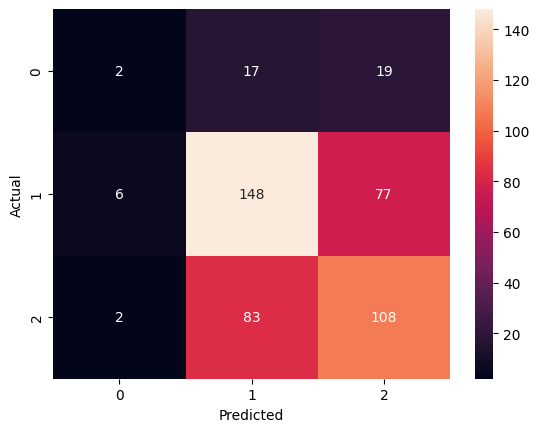

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [67]:
daily[['position_size','win_rate','trade_count']].head()
daily[['position_size','win_rate','trade_count']].isna().sum()
daily[['position_size','win_rate','trade_count']].dtypes


,0
position_size,float64
win_rate,float64
trade_count,object


In [71]:
# Create win column
# Create win column
data['win'] = (data['pnl'] > 0).astype(int)

# Aggregate per trader per day
behavior_daily = data.groupby(['trader_id','date']).agg(
    trade_count=('pnl','count'),
    win_rate=('win','mean')
).reset_index()

daily = daily.merge(
    behavior_daily,
    on=['trader_id','date'],
    how='left'
)

In [72]:
daily.columns



Index(['trader_id', 'date', 'pnl', 'position_size', 'sentiment_value',
       'sentiment_label', 'next_day_pnl', 'target', 'trade_count_x',
       'win_rate_x', 'trade_count_y', 'win_rate_y', 'trade_count', 'win_rate'],
      dtype='object')

In [73]:
from sklearn.cluster import KMeans

cluster_features = daily[['position_size','win_rate','trade_count']]

kmeans = KMeans(n_clusters=3, random_state=42)
daily['cluster'] = kmeans.fit_predict(cluster_features)

daily.groupby('cluster')[['position_size','win_rate','trade_count']].mean()


,position_size,win_rate,trade_count
cluster,,,
0,26219.841155,0.356020,74.272131
1,2854.915265,0.358625,93.837607
2,111533.204417,0.309524,4.857143


In [74]:
cluster_features = daily[['position_size','win_rate','trade_count']].copy()

# Replace ellipsis with NaN
cluster_features = cluster_features.replace({Ellipsis: None})

# Convert to numeric safely
cluster_features = cluster_features.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
cluster_features = cluster_features.dropna()


In [75]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
daily.loc[cluster_features.index, 'cluster'] = kmeans.fit_predict(cluster_features)

daily.groupby('cluster')[['position_size','win_rate','trade_count']].mean()



,position_size,win_rate,trade_count
cluster,,,
0,26219.841155,0.356020,74.272131
1,2854.915265,0.358625,93.837607
2,111533.204417,0.309524,4.857143


In [76]:
cluster_features.isna().sum()


,0
position_size,0
win_rate,0
trade_count,0


In [77]:
(cluster_features == ...).sum()


,0
position_size,0
win_rate,0
trade_count,0


In [78]:
cluster_summary = daily.groupby('cluster')[['position_size','win_rate','trade_count']].mean()
print(cluster_summary)


         position_size  win_rate  trade_count
cluster                                      
0         26219.841155  0.356020    74.272131
1          2854.915265  0.358625    93.837607
2        111533.204417  0.309524     4.857143


In [79]:
sentiment_impact = daily.groupby('sentiment_label')['pnl'].mean()
print(sentiment_impact)


sentiment_label
Extreme Fear     4619.439053
Extreme Greed    5161.922644
Fear             4886.124564
Greed            3339.584959
Neutral          3428.225792
Name: pnl, dtype: float64


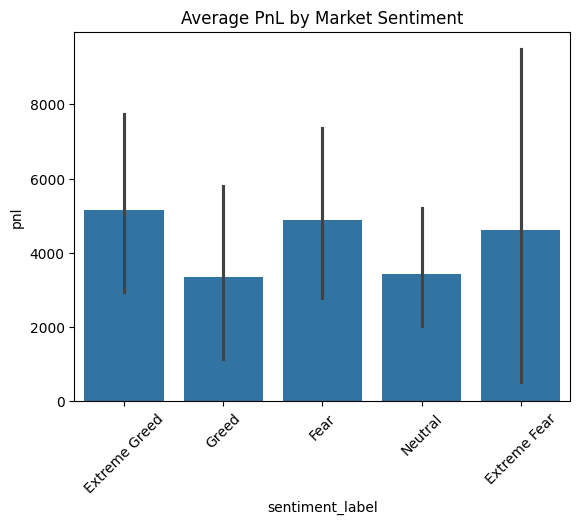

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sentiment_label', y='pnl', data=daily)
plt.xticks(rotation=45)
plt.title("Average PnL by Market Sentiment")
plt.show()


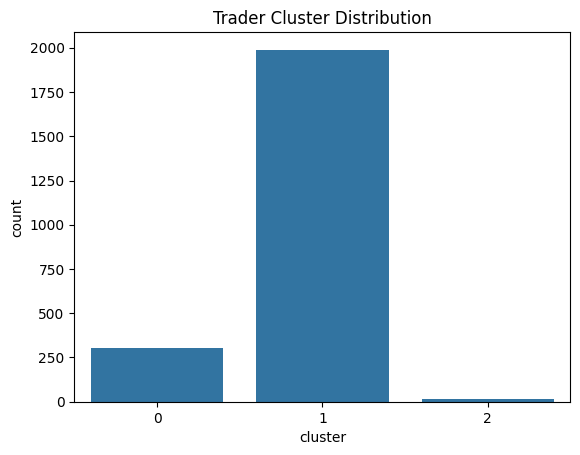

In [81]:
sns.countplot(x='cluster', data=daily)
plt.title("Trader Cluster Distribution")
plt.show()


In [82]:
daily.to_csv("daily.csv", index=False)


In [83]:
!pip install streamlit pyngrok


In [84]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Page config
st.set_page_config(page_title="Trader Behavior Dashboard", layout="wide")

st.title("📊 Trader Behavior & Sentiment Analysis Dashboard")

# Load data
daily = pd.read_csv("daily.csv")

# Sidebar
st.sidebar.header("Filters")

cluster_option = st.sidebar.selectbox(
    "Select Cluster",
    options=["All"] + sorted(daily["cluster"].dropna().unique().tolist())
)

if cluster_option != "All":
    filtered_data = daily[daily["cluster"] == cluster_option]
else:
    filtered_data = daily.copy()

# -------------------------
# Cluster Distribution
# -------------------------
st.subheader("🔹 Cluster Distribution")

fig1 = plt.figure()
sns.countplot(x='cluster', data=daily)
plt.title("Trader Cluster Distribution")
st.pyplot(fig1)

# -------------------------
# Sentiment vs PnL
# -------------------------
st.subheader("🔹 Average PnL by Sentiment")

if "sentiment_label" in daily.columns:
    fig2 = plt.figure()
    sns.barplot(x='sentiment_label', y='pnl', data=filtered_data)
    plt.xticks(rotation=45)
    plt.title("Average PnL by Market Sentiment")
    st.pyplot(fig2)
else:
    st.warning("Sentiment label column not found.")

# -------------------------
# Cluster Summary Table
# -------------------------
st.subheader("🔹 Cluster Behavioral Summary")

cluster_summary = daily.groupby('cluster')[['position_size','win_rate','trade_count']].mean()

st.dataframe(cluster_summary)

# -------------------------
# Key Metrics
# -------------------------
st.subheader("🔹 Key Metrics")

col1, col2, col3 = st.columns(3)

col1.metric("Total Traders", daily['trader_id'].nunique())
col2.metric("Average Win Rate", round(daily['win_rate'].mean(), 2))
col3.metric("Average Position Size", round(daily['position_size'].mean(), 2))

st.markdown("---")
st.markdown("Dashboard created using Streamlit 🚀")




Overwriting app.py


In [85]:
!pip install streamlit pyngrok


In [86]:
!pip install streamlit pyngrok --quiet


In [87]:
from pyngrok import ngrok

ngrok.set_auth_token("39t8btjCUUgJkHZ2BweIkpHQjXm_zW69UtdJeATZVGRRTTjU")


In [88]:
%%writefile app.py


Overwriting app.py


In [89]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("Trader Behavior Dashboard")

daily = pd.read_csv("daily.csv")

st.subheader("Cluster Distribution")
fig1 = plt.figure()
sns.countplot(x='cluster', data=daily)
st.pyplot(fig1)

st.subheader("Average PnL by Sentiment")
fig2 = plt.figure()
sns.barplot(x='sentiment_label', y='pnl', data=daily)
plt.xticks(rotation=45)
st.pyplot(fig2)

st.subheader("Cluster Summary")
st.write(daily.groupby('cluster')[['position_size','win_rate','trade_count']].mean())


Overwriting app.py


In [90]:
import subprocess
from pyngrok import ngrok

# Start streamlit
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

# Create public URL
public_url = ngrok.connect(8501)

print("🚀 Your Dashboard URL:")
print(public_url)


🚀 Your Dashboard URL:
NgrokTunnel: "https://bidentate-untranscendental-jenette.ngrok-free.dev" -> "http://localhost:8501"


In [93]:
daily.to_csv("daily.csv", index=False)


In [95]:
!pip install plotly


In [97]:
import plotly.express as px

# Cluster Visualization
fig1 = px.scatter(
    daily,
    x="position_size",
    y="win_rate",
    color="cluster",
    size="trade_count",
    hover_data=["sentiment_value"],
    title="Trader Behavior Clusters"
)
fig1.show()

# Sentiment vs Win Rate
fig2 = px.scatter(
    daily,
    x="sentiment_value",
    y="win_rate",
    color="cluster",
    title="Sentiment vs Win Rate"
)
fig2.show()

# Cluster Summary Table
daily.groupby('cluster')[[
    'position_size',
    'win_rate',
    'trade_count',
    'sentiment_value'
]].mean()


,position_size,win_rate,trade_count,sentiment_value
cluster,,,,
0,26219.841155,0.356020,74.272131,53.600000
1,2854.915265,0.358625,93.837607,55.178984
2,111533.204417,0.309524,4.857143,41.000000


In [98]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# -----------------------
# KPI METRICS
# -----------------------

total_traders = daily['trader_id'].nunique()
avg_win_rate = daily['win_rate'].mean()
avg_position = daily['position_size'].mean()
avg_trades = daily['trade_count'].mean()

print("📊 KEY METRICS")
print("Total Traders:", total_traders)
print("Average Win Rate:", round(avg_win_rate, 3))
print("Average Position Size:", round(avg_position, 2))
print("Average Trades per Day:", round(avg_trades, 2))


# -----------------------
# 1️⃣ CLUSTER SCATTER (Enhanced)
# -----------------------

fig1 = px.scatter(
    daily,
    x="position_size",
    y="win_rate",
    color="cluster",
    size="trade_count",
    hover_data=["sentiment_value"],
    title="Trader Behavioral Segmentation",
)

fig1.update_layout(template="plotly_dark")
fig1.update_xaxes(type="log")
fig1.show()


# -----------------------
# 2️⃣ SENTIMENT IMPACT
# -----------------------

fig2 = px.scatter(
    daily,
    x="sentiment_value",
    y="win_rate",
    color="cluster",
    trendline="ols",
    title="Market Sentiment vs Trader Win Rate"
)

fig2.update_layout(template="plotly_dark")
fig2.show()


# -----------------------
# 3️⃣ CLUSTER PROFILE BAR CHART
# -----------------------

cluster_summary = daily.groupby('cluster')[[
    'position_size',
    'win_rate',
    'trade_count'
]].mean().reset_index()

fig3 = px.bar(
    cluster_summary,
    x="cluster",
    y=["position_size", "win_rate", "trade_count"],
    barmode="group",
    title="Cluster Behavioral Comparison"
)

fig3.update_layout(template="plotly_dark")
fig3.show()


📊 KEY METRICS
Total Traders: 32
Average Win Rate: 0.358
Average Position Size: 6601.8
Average Trades per Day: 90.71
